# Classification
<img src="photo/3.PNG">

$Odds, {P(X)\over{(1-P(X))}}$ -> [0,1] $ \ log_e(Odds)$ => $\beta_0+\beta_1X$ => ${e^{\beta_0+\beta_1X} \over {1+e^{\beta_0+\beta_1X}}}$ => $1 \over {1+e^{-X}}$

<br>

 코드를 보기 전 <a href="Statistics_Classification.pdf"> 이론</a>을 보고 시작할 것.
 - 이 데이터에서 나오는 $Balance$의 경우 예를 들어 100만원의 카드 값에서 50만원을 갚으면 남은 50만원이 $Balance$가 된다.
 - $glm$() : 일반화 선형 모형은 종속변수가 정규분포하지 않는 경우를 포함하는 선형모형의 확장이며 glm()함수를 사용
 - $GLM$(generalized linear model)은 선형 모델이 종속변수에 링크 함수를 통해서 대응하도록 하고, 각 측정 변수의 크기를 예측된 값의 함수에 대응되도록 함으로써 선형 회귀를 만들수 있다. 
  - 이것은 선형 회귀, 로지스틱 회귀, 그리고 푸아송 회귀를 포함하는 다양한 통계적 모델을 통합했다.

참조 

    함수 glm()은 선형 예측 값의 설명과 오차의 분포를 특정지어 일반화선형모형(Generalized linear model)을 적합 하는 데 사용된다. 
    R 에서 로지스틱 회귀분석을 실시할 때 반응변수 1을 기준으로 모형이 만들어진다. 
    반응변수를 숫자가 아닌 문자로 입력한 경우 문자변수를 factor로 입력하여 사용하면 알파벳 순서 역순의 값을 기준으로 모형을 만든다.
    (예: no, yes로 입력하면 yes를 기존으로 모형을 만듬)

## Sigmoid Function 
 <img src="https://qph.ec.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba?convert_to_webp=true">

## Simple Logistic Regression 
 $$P(X) =  {e^{\beta_0+\beta_1X} \over {1+e^{\beta_0+\beta_1X}}}   <=> {log({p(X) \over {1-p(X)}}) = \beta_0 + \beta_1X} $$
 - log-odd(logit)
 - Odds = 성공확률 / 실패확률

<img src="photo/4.PNG">
<img src="photo/5.PNG">

In [1]:
library(ISLR)

Warning message:
: package 'ISLR' was built under R version 3.3.2

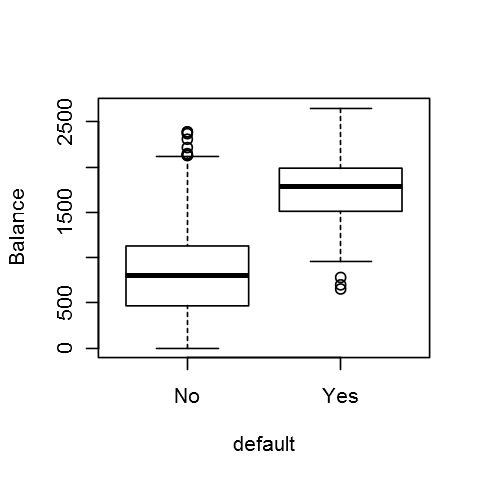

In [6]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(balance~default, data = Default, ylab="Balance", xlab="default")

In [8]:
model = glm(default~balance,data=Default,family = binomial) # family binomial => Classifier (Yes or No)
summary(model)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


- $log({p \over{(1-p)}}) = -10.65 + 0.005balance$

 - Balance 단위 1이 올라갈때마다 $e^{5.499e-03}$ 배 만큼 상승한다.

In [22]:
exp(5.499e-03) # Balance가 1불 증가할때 0.5프로 0.005배 증가한다. 
exp(model$coefficients[[2]])

[1] 1.005514

[1] 1.005514

In [14]:
exp(5.499e-03*100) # Balance가 100불 증가할때 73% 증가한다.
exp(model$coefficients[[2]]*100)

[1] 1.73308

[1] 1.733065

### 카드 Balance가 $1,000인 사람의 파산 확률은?

In [16]:
predict(model,data.frame(balance=1000))

1 
-5.152414

In [21]:
exp(predict(model,data.frame(balance=1000))) / (1+exp(predict(model,data.frame(balance=1000))))

1 
0.005752145

 - P값을 계산해준다.
 - 파산 확률은 0.06% 

In [24]:
predict(model,data.frame(balance=1000),type="response")

1 
0.005752145

## Multivariable logistic regression 
 $$P(X) =  {e^{\beta_0+\beta_1X} \over {1+e^{\beta_0+\beta_1X}}}   <=> {log({p(X) \over {1-p(X)}}) = \beta_0 + \beta_1X} $$
 - 위의 식에서 독립변수 갯수와 가중치 갯수 증가.
 - 각 항목의 독립변수가 고정이라고 할때, 각 $x_i$가 올라갈때 마다 $b_i$의 영향도를 판단.

In [27]:
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [28]:
head(Default,3)

,default,student,balance,income
1,No,No,729.526495207286,44361.6250742669
2,No,Yes,817.180406555498,12106.1347003149
3,No,No,1073.54916401173,31767.1389473999


In [25]:
model1 = glm(default ~ balance + income + student, data=Default, family = binomial)
summary(model1)


Call:
glm(formula = default ~ balance + income + student, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


 - 위의 $Model$에 따르면 
  - $Balance$와 $Student$가 $Default$에 영향을 주고 있다. 
  - 하지만 $Income$에 대해서는 유의할 수준에 영향을 주지 않는다. $P-value >0.05$

In [30]:
model_tmp = glm(default ~ student, data=Default, family = binomial)
summary(model_tmp)


Call:
glm(formula = default ~ student, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentYes   0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


 - Model1에서의 Student와 Model_tmp에서의 Student의 영향도의 방향이 다르다. 
 - Model1 : 학생일때 0.52배 감소 즉 48% 감소 한다. 
 - 즉, 동일한 카드 Balance 경우 학생이 더 믿을만하다.
 - Model_tmp의 경우 1.5배 상승.

In [34]:
exp(model1$coefficients[[4]])
exp(model_tmp$coefficients[[2]]) 

[1] 0.5237317

[1] 1.499133

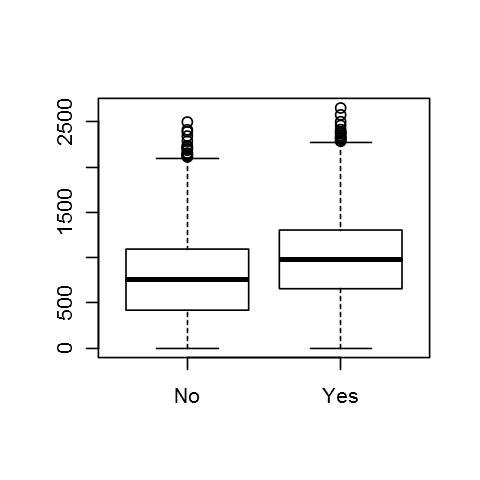

In [32]:
boxplot(balance ~ student, Default)

 - 학생들이 학생장고가 많다 => 벨런스가 높다 => 파산가능성이 높아진다. 
 - 하지만 Multiple Linear에서는 끊어준다.

# Practice 5 #### 
     1.	Smarket dataset in ISLR library
     S&P500 지수의 수익률을 1250일간 기록한 데이터이다. Lag1-Lag5는 1일에서 5일 전의 수익률을 나타내고 
     Volume은 전일 거래량(in billions), Today는 오늘의 수익률, Direction은 오늘 시장의 상승(up)과 하락(down)을 나타낸다. 
     로지스틱 회귀분석을 이용하여 아래의 질문에 답하시오.
     A.	Lag변수들과 Volume을 사용하여 시장의 상승 하락을 예측하는 모형을 추정하고 추정된 모형을 기술하시오.
     B.	추정된 회귀계수를 해석하시오.

In [36]:
Smarket <- Smarket
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [37]:
s_model <- glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family = binomial)
summary(s_model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


 - 우선 모든 값들이 유의하게 영향을 미치지 않는다는 결론부터 난다. $P-value > 0.05$
 
 - 하루, 이틀 간의 데이터는 음의 관계를 가진다. 즉, 1~2일 사이 상승 하였을 경우 다음 날 떨어질 확률이 높고, 하락 하였으면 상승할 가능성이 높다. 
 - 3,4,5일 전 주식이 상승했을 경우 오늘도 오를 가능성이 높아지고, 하락하였을 경우 떨어질 가능성이 높다.

In [39]:
exp(s_model$coefficients[[2]]) # 1증가하면 다음날 증가 할 가능성이 7% 떨어진다. 0.92배. 
exp(s_model$coefficients[[3]]) 
exp(s_model$coefficients[[4]])
exp(s_model$coefficients[[5]])
exp(s_model$coefficients[[6]])

[1] 0.9295323

[1] 0.9585809

[1] 1.011147

[1] 1.009403

[1] 1.010366

 - Valume 이 1이 높아지면 15% 상승.

In [40]:
exp(s_model$coefficients[[7]])

[1] 1.145041

# Deviance goodness of fit test
 - 모델 비교 
 - 두개 모델을 입력하여 비교가 가능하지만, 하나만 넣어서도 사용 할 수 있다.

 - Null deviance : 파라미터 없이 intercept 만 있을때 자유도 
 - Residual deivance : 입력한 파라미터 전부와 intercept 를 포함 했을때 자유도.

In [41]:
summary(model1)


Call:
glm(formula = default ~ balance + income + student, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


## Anova 
 - model1 : Full model 
 - model_tmp : reduced model 
 
 - Reduced model과 full model의 차이가 유의한지 검정.
 - 여러 설명변수가 주는 영향이 유의한지 한번에 검정.
  - 다중 회귀의 F-Test와 비슷
 - $Pr(>Chi)$
  - $H_0:$ 두 모델이 차이가 X
  - 즉, $p-value < 0.05$ => 차이가 있다. 
 - Balance와 income의 영향이 deafult 롹률을 예측하는데 유의하다. 

In [42]:
anova(model1,model_tmp, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,9996.000,1571.545,NA,NA,NA
2,9.998000e+03,2.908683e+03,-2.000000e+00,-1.337138e+03,4.406778e-291


 - 각 변수가 설명해주는 설명력?

In [43]:
anova(model1, test = 'Chisq')

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,9999.00,2920.65,NA
balance,1.000000e+00,1.324198e+03,9.998000e+03,1.596452e+03,6.232869e-290
income,1.000000e+00,1.748541e+01,9.997000e+03,1.578966e+03,2.895205e-05
student,1.000000e+00,7.421443e+00,9.996000e+03,1.571545e+03,6.445112e-03


## 반복 측정된 자료 
 - 한 개의 X값에서 여러 개의 Y가 측정된 경우 
 - $X_i$에서의 관측치가 0,1이 아니라 $n_i$개 중 $Y_i$개의 성공 관측 
 - $Binomial Distribution$ 
 $$ f(Y_i) = {n_i! \over Y_i!(N-i-Y_i)!}\pi_i^{Yi}(1-\pi_i)^{n_i-Y_i}$$

## Example : Coupon Effectiveness

In [44]:
Coupon <- read.csv("coupon.csv")

In [46]:
head(Coupon,3)

,Price_reduc,N,N_redeemed
1,5,200,30
2,10,200,55
3,15,200,70


In [48]:
cbind(Coupon$N_redeemed,Coupon$N-Coupon$N_redeemed)

30,170
55,145
70,130
100,100
137,63


In [49]:
model4 <- glm(cbind(N_redeemed,N-N_redeemed)~Price_reduc,data=Coupon,family = binomial)
summary(model4)


Call:
glm(formula = cbind(N_redeemed, N - N_redeemed) ~ Price_reduc, 
    family = binomial, data = Coupon)

Deviance Residuals: 
      1        2        3        4        5  
-0.8988   0.6677  -0.1837   0.7612  -0.5477  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.044348   0.160977  -12.70   <2e-16 ***
Price_reduc  0.096834   0.008549   11.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 149.4627  on 4  degrees of freedom
Residual deviance:   2.1668  on 3  degrees of freedom
AIC: 33.793

Number of Fisher Scoring iterations: 3


 - Coupon의 값이 1불 올라갈때마다, exp(0.096)이 올라간다. 
  - 즉, 1.1배 증가.

In [50]:
exp(model4$coefficients[[2]])

[1] 1.101677

 - 5불에 대해 10불짜리가 사용 될 odds ?
  - 1.6배 증가. 

In [51]:
exp(model4$coefficients[[2]]*5)

[1] 1.622824

## 오분류율, 민감도, 특이도
 <img src="photo/1.PNG">

 - 파산할 확률

In [53]:
head(model1$fitted.values)

1            2            3            4            5            6 
0.0014287239 0.0011222039 0.0098122716 0.0004415893 0.0019355062 0.0019895182

In [54]:
pred = data.frame(default=Default$default,fit = model1$fitted.values)
head(pred)

,default,fit
1,No,0.00142872392899569
2,No,0.00112220387264348
3,No,0.00981227160721864
4,No,0.000441589338756934
5,No,0.00193550620958732
6,No,0.00198951817036982


 - 10,000명 중 333명 파산 

In [55]:
table(pred$default)


  No  Yes 
9667  333 

 - 우선 0.5에서 Cutoff

In [57]:
xt <- xtabs(~ default + (fit>0.5), data=pred)
xt

       fit > 0.5
default FALSE TRUE
    No   9627   40
    Yes   228  105

In [63]:
str(xt)

 int [1:2, 1:2] 9627 228 40 105
 - attr(*, "dimnames")=List of 2
  ..$ default  : chr [1:2] "No" "Yes"
  ..$ fit > 0.5: chr [1:2] "FALSE" "TRUE"
 - attr(*, "class")= chr [1:2] "xtabs" "table"
 - attr(*, "call")= language xtabs(formula = ~default + (fit > 0.5), data = pred)


In [70]:
print(paste0("Error:",(xt[[3]] + xt[[2]]) / 10000))
print(paste0("Sensitivity:",(xt[[4]]) / (xt[[4]] + xt[[2]])))  # P -> P
print(paste0("Specificity:",(xt[[1]]) / (xt[[1]]+xt[[3]])))    # N -> N

[1] "Error:0.0268"
[1] "Sensitivity:0.315315315315315"
[1] "Specificity:0.995862211647874"


## ROC(Receiver Operating Characteristic) Curve
 - y-lab : 민감도 (Sensitivity(P->P) ratio)
 - x-lab : 1-Specificity(특이도) => False positive rate
 <img src="photo/2.PNG">

In [73]:
library(ROCR)

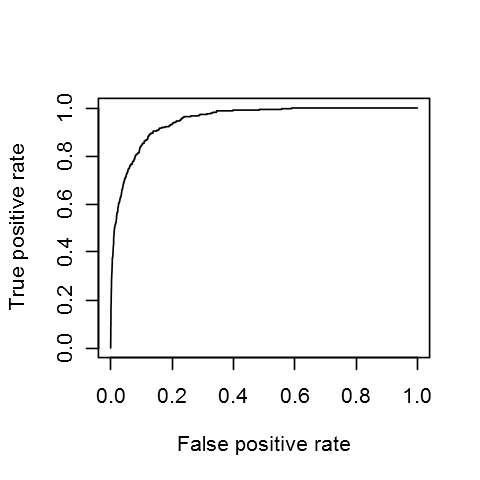

In [72]:
predob = prediction(pred$fit,pred$default)
plot(performance(predob,"tpr","fpr")) # true positive rate # false positive rate

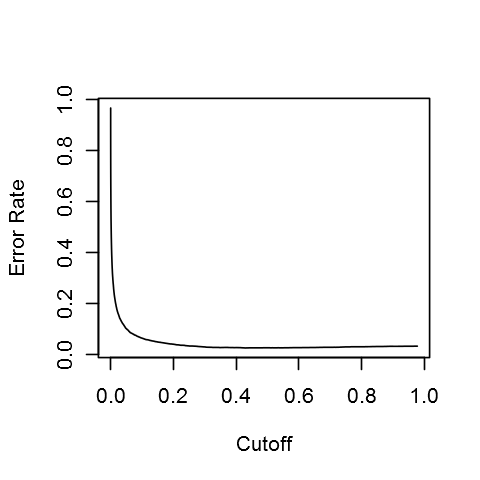

In [74]:
plot(performance(predob,"err")) # 그래프를 보고 cutoff를 선정할 수 있다. 